In [1]:
from edgar_prelim import *
import pandas as pd
%load_ext autoreload
%autoreload 2
%matplotlib inline
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [2]:
cik='0000004962'

In [3]:
# Parameters
cik = "0000712537"


# Company

In [4]:
cik_df = pd.read_sql(text("select cik, sic, sic_description, company_name, ticker from cik where cik = :cik").bindparams(cik=cik), prelim_engine)
cik_df.rename({'cik': 'CIK', 'sic': 'SIC', 'sic_description': 'Description', 'company_name': 'Name', 'ticker': 'Ticker'}, axis=1).T.rename({0: ''}, axis=1)

,
CIK,0000712537
SIC,6021
Description,NATIONAL COMMERCIAL BANKS
Name,FIRST COMMONWEALTH FINANCIAL CORP /PA/
Ticker,FCF


In [5]:
prelims = query_prelims(cik)

# Summary Statistics

In [6]:
prelims.groupby('item').item_value.describe()

,count,mean,std,min,25%,50%,75%,max
item,,,,,,,,
book value per share,63.0,7.837619e+00,7.195064e-01,7.08,7.375000e+00,7.59,7.97,1.012000e+01
interest income,74.0,6.732932e+07,1.185797e+07,50150000.00,5.599375e+07,66240500.00,78922250.00,8.613900e+07
net income,74.0,1.121076e+07,7.989304e+06,-18619000.00,9.900500e+06,12263000.00,13968500.00,3.208100e+07
net interest income,74.0,4.713186e+07,6.801101e+06,34989000.00,4.227800e+07,46601500.00,50442000.00,6.548600e+07
provision for loan losses,74.0,1.095993e+07,2.044132e+07,-1826000.00,2.367750e+06,3230000.00,6865750.00,1.005690e+08
total revenue,13.0,7.651569e+07,8.175051e+06,63464000.00,6.909800e+07,79381000.00,84068000.00,8.604300e+07


# Plots

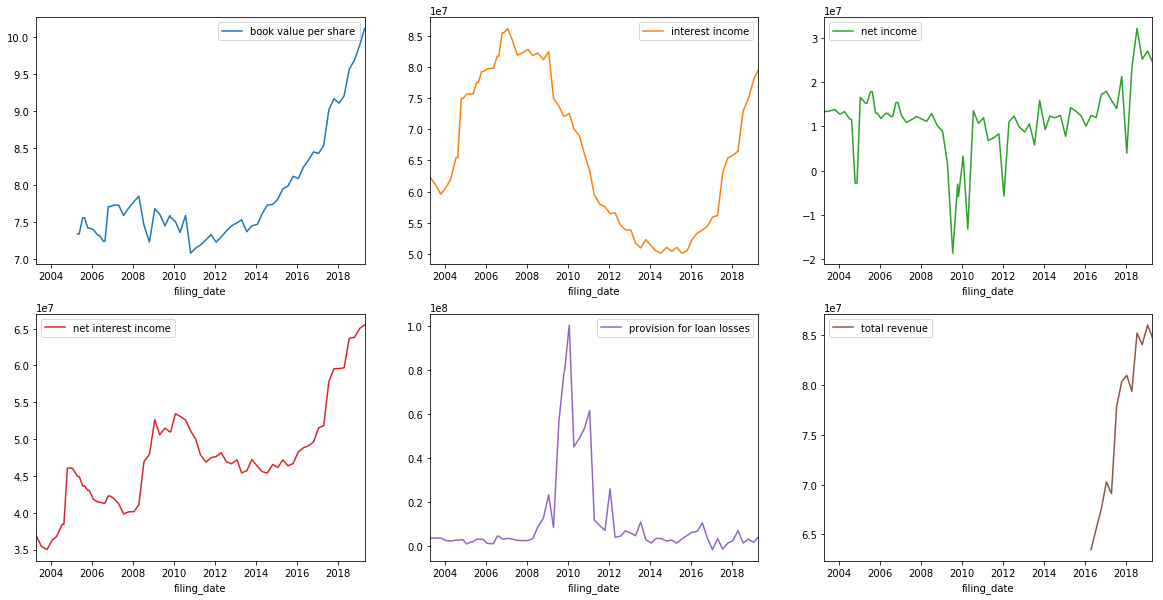

In [7]:
_ = prelims.set_index('filing_date').pivot(columns='item', values='item_value').fillna(method="ffill").plot(subplots=True, layout=(2, 3), figsize=(20, 10), sharex=False)

# Quality

In [8]:
validate_prelims(prelims)

period   msg_type  \
cik        item                                                            
0000712537 book value per share   2003Q1 to 2004Q4: 8 periods    missing   
           book value per share                        2007Q1    missing   
           net income                                  2009Q3  duplicate   
           total revenue         2003Q1 to 2015Q4: 52 periods    missing   

                                          message  
cik        item                                    
0000712537 book value per share    Missing period  
           book value per share    Missing period  
           net income            Duplicate period  
           total revenue           Missing period

# Data

In [9]:
def make_clickable(val: str) -> str: 
    if isinstance(val, str):
        name, url = val.split('#')
        return f'<a href="{url}">{name}</a>'
    else:
        return ''

(prelims
 .assign(fiscal_period = prelims.fiscal_period.str.cat(prelims.filing_href, sep='#'), filing_date = prelims.filing_date.map(lambda d: d.strftime('%Y-%m-%d')))
 .loc[:, ['filing_date', 'fiscal_period', 'item', 'item_value', 'src_table', 'src_row', 'src_column', 'src_value', 'src_units']]
 .set_index(['filing_date', 'item'])
 .style.format({'fiscal_period': make_clickable})
)

In [10]:
#discard_prelim(cik, date(2019, 12, 31))
#force_reload_prelim(cik, date(2019, 12, 31), delete_filings=False)
#force_reload_prelim_between(cik,  start=date(2002, 6, 1), end=date(2019, 12, 31), delete_filings=False)

In [11]:
#d = date(2018, 10, 29)
#extract_prelim_statements(cik, start=d, end=d)

In [12]:
#d = date(2019, 4, 22)
#filings = query_edgar_for_filings(cik, "8-K", start=d, end=d, require_xbrl=False)
#report = query_edgar_for_submission_text(filings[0].href)
#submission = load_submission(report.href)
#tables = list(parse_tables(submission))
#items_from_tables(tables)

In [13]:
#widget = query_prelims_for_override(cik, filing_date='2006-01-27', item=None)
#widget

In [14]:
#widget.save()